<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, SS17

# Assignment 4 - Matrix Decompositions

Let us first setup this notebook so that figures and plots can be shown in it.

In [1]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy as np
import matplotlib.pyplot as plt
            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython

**Hint**: Before you start solving the assignment, you might want to check the following *numpy* functions:

```
numpy.linalg.svd
```

## Covariance matrix properties

Answer the following questions in a mathematically sound manner:

1) Given a matrix $X$ of size ${m\times n}$, where $m$ is the number of variables and $n$ is the number of observations, and its mean vector $\bar{X}$, why does the expression

$$ \frac{(X - \bar{X})(X - \bar{X})^{T}}{n-1}  $$

yield the covariance matrix of $X$?

2) What are the conditions under which taking the eigendecomposition of a matrix yields an orthonormal basis?

3) When applying principal components analysis, why does each eigenvector point in the direction of the principal components of the data? In addition, why is the contribution of the components to the overall variance related to each eigenvector's eigenvalue?



## Solution 

1) The given expression is a rework of the definition of covariance, which is : 

$$ \frac{(X - \bar{X})(Y - \bar{Y})}{n-1}  $$

Now, when finding covariance of a matrix $X$(${m\times n}$), in effect, we need to find the variation of eaach variable. That is, how the observation data varies for the individual variables. Thus, the second part of  numerator the above equation can be re-written as, $(X - \bar{X})^{T}$. 
Thus, we can rewrite the covariance as :

$$ \frac{(X - \bar{X})(X - \bar{X})^{T}}{n-1}  $$

Thus from the above, the final $m\times m$ matrix gives the variances of the data along the diagonal and the remaining elements give us the covariance of the variables. Thus is also called variance co-variance matrix.

2) Eigen decomposition of _real_ and _symmetric matrices_ yeilds an orthonormal basis. 

3) Using PCA, we want to maximize the variation of a projection of a data set, to emphasize the patterns in the set.  And, the covariance matrix gives us the variations of the dataset. 

We know,the eigen vectors of a matrix gives us a direction along which the matrix only scales the vector. As such, the eigen vector of the covariance matrix will give us the direction along which the covariance matrix scales the vector, thus a direction of it's variance. 

Again, the eigen value of a matrix gives us a value (magnitude) by which the eigen vector is scaled by the matrix. Thus, higher the magnitude of the eigen value, greater the scaling. 

Putting these two concepts together, we get that for a covariance matrix, the highest variation in the dataset lies along the direction corresponding to the eigen vector for the largest eigen value. Thus, each eigen vector will point towards the principal components of the data set. This, in turn, will be related to the value of each eigen value as explained above



## Fitting lines to point clouds

Before your start with the assignment, read [this article about least squares fitting](http://mathworld.wolfram.com/LeastSquaresFitting.html) and this [lecture about linear least squares and matrix decompositions](http://classes.soe.ucsc.edu/cmps290c/Spring04/paps/lls.pdf).

**Now, use the singular value decomposition for fitting lines to the given point clouds in all of the following tasks.**

### Detecting a hallway

Let's suppose that a robot is driving in a hallway and its Kinect obtains the following point cloud:

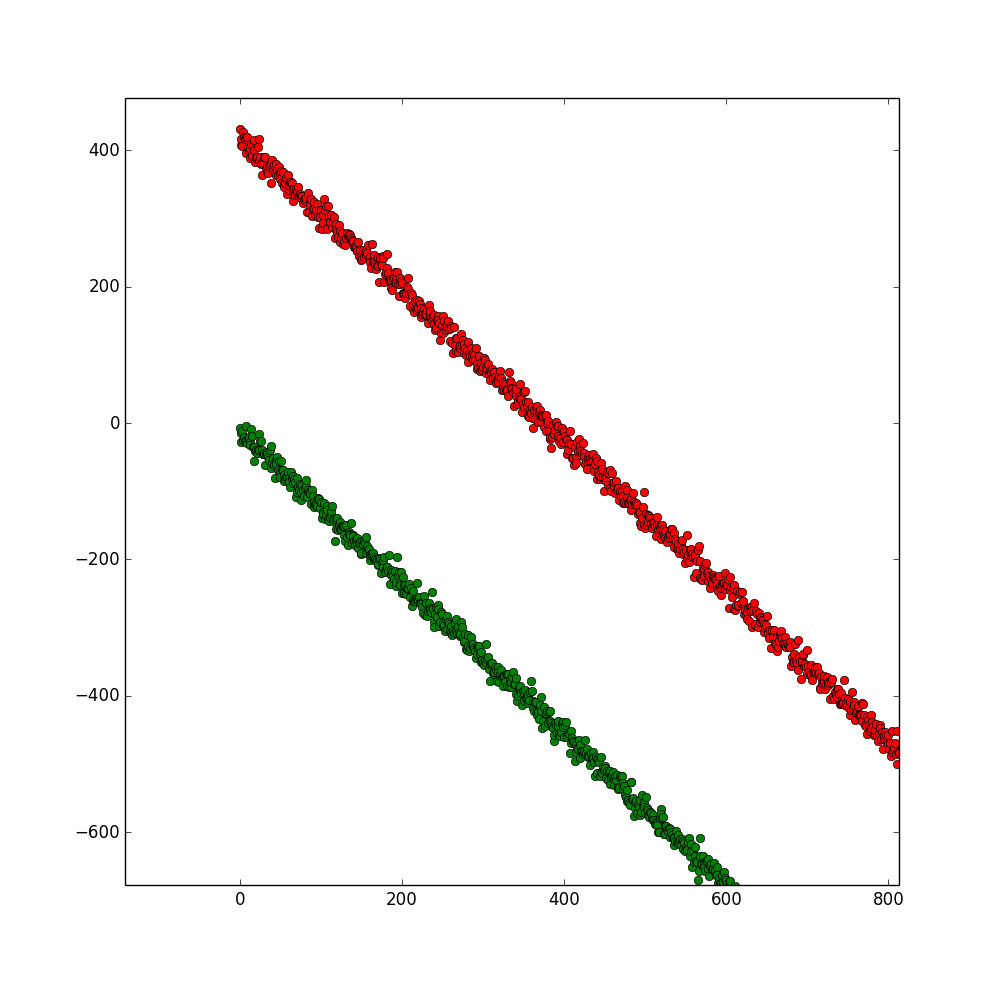

In [2]:
IPython.core.display.Image("images/hallway.png", embed=True)

Your task is to fit a pair of parallel lines based on the points generated by the robot's Kinect. The point clouds of the two lines are stored in *data/P1.npy* and *data/Q1.npy*, so you need to use those two files here. After obtaining the parameters of the lines, plot the lines together with the point clouds to verify that you have indeed found the correct parameters.

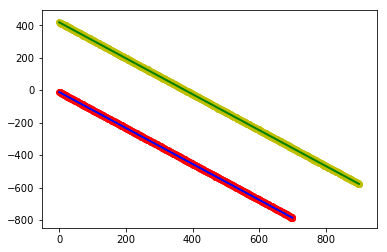

In [3]:
"""
USING Total Least Square Method (TLS) :Perpendicular Offsets
And plotting both lines together.
"""

"""
The clsq function definition is taken from the lecture notes to solve the
constrained least squares problem. That is, A * [c n]’ = 0 , len(n) = dim
"""

def clsq(A, dim):

    m, p = A.shape
    if p < dim + 1:
        print 'not enough unknowns'
        return None
    if m < dim:
        print 'not enough equations'
        return None
    m = min(m, p)
    Q, R = np.linalg.qr(A, mode='complete')                   #This gives the QR decomposition of A
    
    U, S, VT = np.linalg.svd(R[p-dim-1:m, p-dim-1:p])         #The R (right triangular matrix) is used to 
                                                              # find the eigen vector which in turn gives us n 
    n = VT[dim, :]
    
    """
    using n, we solve the remaining section of R to give us c
    """
    c = np.linalg.lstsq(-R[0:p-dim-1, 0:p-dim-1], R[0:p-dim-1, p-dim-1:p].dot(n))[0] 
    return c, n


def compute_parallel_lines(first_line, second_line):
        
    """
    For two parallel lines, equations will be:
            c1+n1x+n2y=0  --------- line P
            c2+n1x+n2y=0  --------- line Q
    where, (n1, n2) refers to normal to line P
    since P and Q are parallel, so normal to line Q will also be: (n1,n2)
    
    And matrix A can be represented by:
    A = [   op zp Px Py
            zq oq Qx Qy 
        ]    
    """
      
    px=first_line[:,0]
    py=first_line[:,1]
    color_p1='r'
    color_p2='b'
    qx=second_line[:,0]
    qy=second_line[:,1]
    color_q1='y'
    color_q2='g'
    
    # creating the matrix A
    A_1 = np.hstack((np.ones((len(px), 1)),np.zeros((len(px), 1)),px[np.newaxis].T,py[np.newaxis].T))
    A_2 = np.hstack((np.zeros((len(qx), 1)),np.ones((len(qx), 1)),qx[np.newaxis].T,qy[np.newaxis].T))
    
    A=np.vstack((A_1,A_2)) #Final A matrix as explained above
    
    c, n = clsq(A, 1) #Calling clsq function to get c and n values
    
    y_fit1=-(c[0]+n[0]*px)/n[1]  #using the equations mentioned above, we get y_fit and plot it for each line
    y_fit2=-(c[1]+n[0]*qx)/n[1]
    plt.scatter(px,py,color=color_p1)
    plt.plot(px, y_fit1, color=color_p2, linewidth=2)
    plt.scatter(qx,qy,color=color_q1)
    plt.plot(qx, y_fit2, color=color_q2, linewidth=2)
    plt.show()

P1=numpy.load("data/P1.npy")
Q1=numpy.load("data/Q1.npy")

compute_parallel_lines(P1,Q1)



### Detecting a corner

At the end of the hallway, our robot detects a dramatic change in the point cloud.

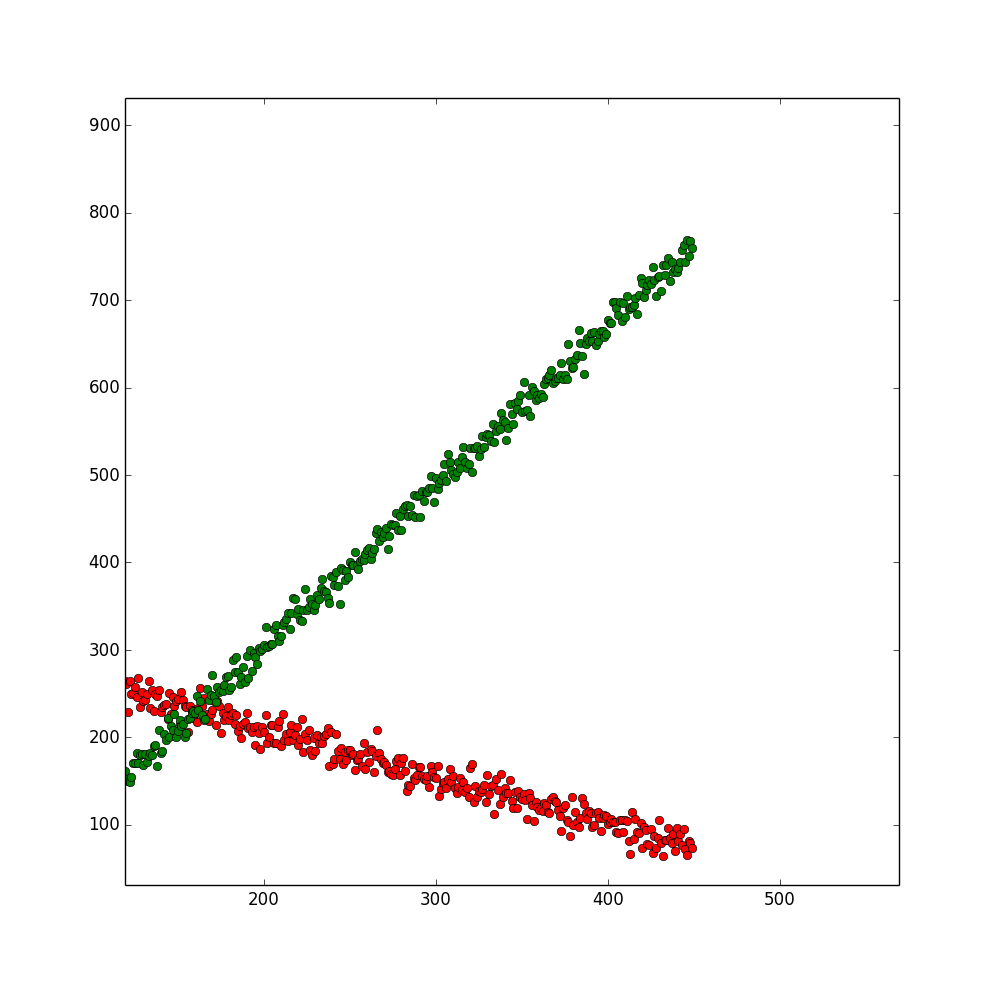

In [4]:
IPython.core.display.Image("images/corner.png", embed=True)

Your task is to fit a pair of perpendicular lines based on the points generated by the robot's Kinect. The point clouds of the two lines are stored in *data/P2.npy* and *data/Q2.npy*, so you need to use those two files here. Once again, plot the lines together with the point clouds to verify that you have indeed found the correct parameters.

c::::  [  7.72906895 -29.55031438]
n::::  [-0.6640938  -0.74764927]


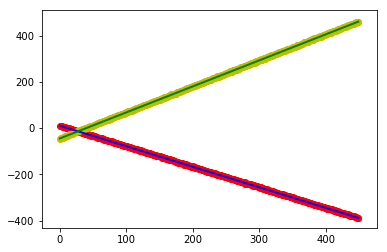

In [5]:
"""
USING Total Least Square Method (TLS) :Perpendicular Offsets
And plotting both lines together.
"""

"""
The clsq function definition is taken from the lecture notes to solve the
constrained least squares problem. That is, A * [c n]’ = 0 , len(n) = dim
"""


def clsq(A, dim):

    m, p = A.shape
    if p < dim + 1:
        print 'not enough unknowns'
        return None
    if m < dim:
        print 'not enough equations'
        return None
    m = min(m, p)
    Q, R = np.linalg.qr(A, mode='complete')
    U, S, VT = np.linalg.svd(R[p-dim-1:m, p-dim-1:p])
    n = VT[dim, :]
    c = np.linalg.lstsq(-R[0:p-dim-1, 0:p-dim-1], R[0:p-dim-1, p-dim-1:p].dot(n))[0]
    return c, n


def compute_perpendicular_lines(first_line, second_line):
    
    """
    For two perpendicular lines, equations will be:
            c1+n1x+n2y=0  --------- line P
            c2-n2x+n1y=0  --------- line Q
    where, (n1, n2) refers to normal to line P
    since P and Q are perpendicular, so normal to line Q will be: (-n2,n1)
    
    And matrix A can be represented by:
    A = [   op zp Px Py
            zq oq Qy -Qx
        ]    
    """
    
    px=first_line[:,0]
    py=first_line[:,1]
    color_p1='r'
    color_p2='b'
    qx=second_line[:,0]
    qy=second_line[:,1]
    color_q1='y'
    color_q2='g'
    
    # creating the matrix A
    A_1 = np.hstack((np.ones((len(px), 1)),np.zeros((len(px), 1)),px[np.newaxis].T,py[np.newaxis].T))
    A_2 = np.hstack((np.zeros((len(qx), 1)),np.ones((len(qx), 1)),qy[np.newaxis].T,-qx[np.newaxis].T))
    
    A=np.vstack((A_1,A_2))
    c, n = clsq(A, 1)
    print "c:::: " ,c
    print "n:::: " ,n
    y_fit1=-(c[0]+n[0]*px)/n[1]
    y_fit2=-(c[1]-n[1]*qx)/n[0]
    plt.scatter(px,py,color=color_p1)
    plt.plot(px, y_fit1, color=color_p2, linewidth=2)
    plt.scatter(qx,qy,color=color_q1)
    plt.plot(qx, y_fit2, color=color_q2, linewidth=2)
    plt.show()

P2=numpy.load("data/P2.npy")
Q2=numpy.load("data/Q2.npy")

compute_perpendicular_lines(P2,Q2)


### Detecting a table

When our robot turns at a table nearby, the point cloud it receives is the following:

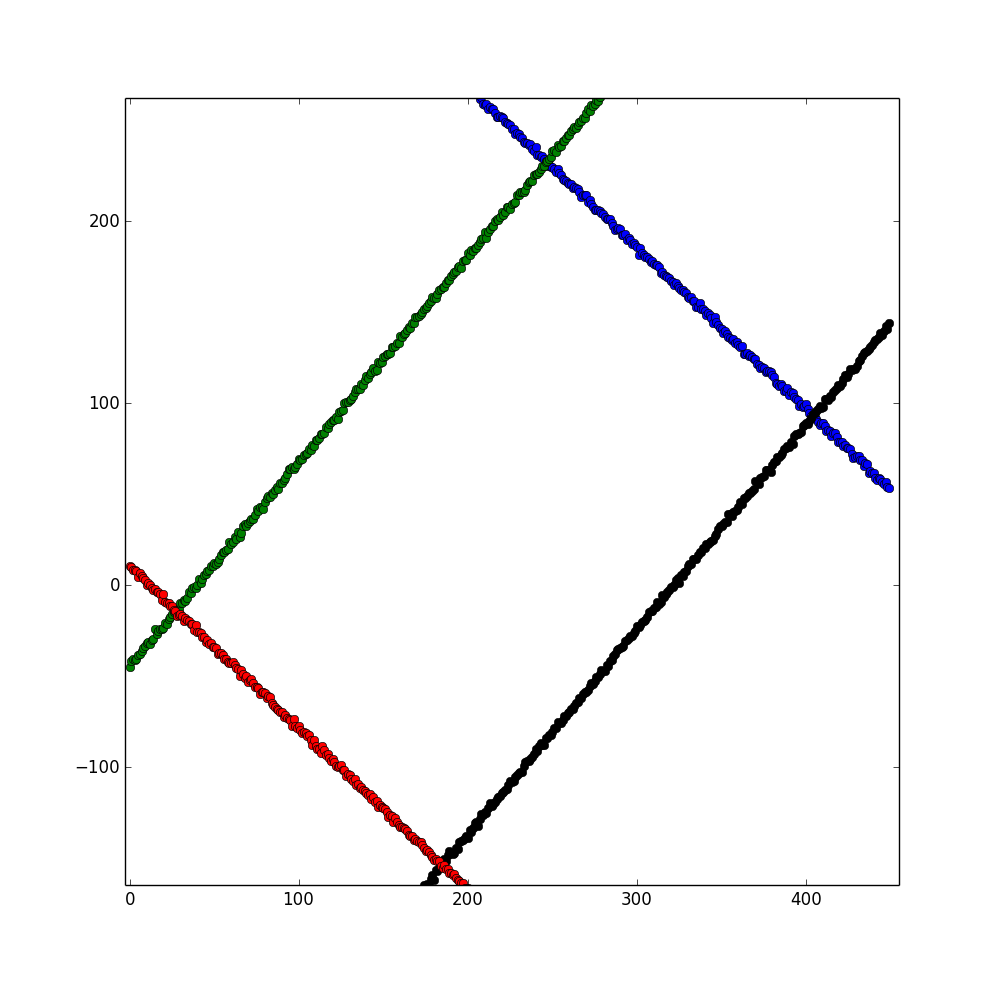

In [6]:
IPython.core.display.Image("images/rectangle.png", embed=True)

This time, your task is to fit four lines (which basically form a rectangle) based on the points generated by the robot's Kinect. The point clouds of the four lines are stored in *data/P2.npy*, *data/Q2.npy*, *data/R2.npy*, and *data/S2.npy*, so you need to use those four files here. Yet again, plot the lines together with the point clouds to verify that you have indeed found the correct parameters.

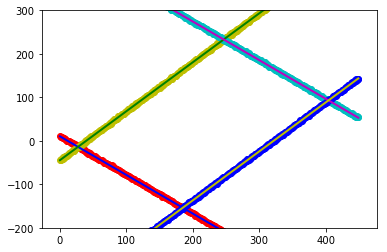

In [7]:
"""
USING Total Least Square Method (TLS) :Perpendicular Offsets

And plotting all the lines together.
"""

"""
The clsq function definition is taken from the lecture notes to solve the
constrained least squares problem. That is, A * [c n]’ = 0 , len(n) = dim
"""


def clsq(A, dim):
    '''
    CLSQ solves the constrained least squares problem
    A * [c n]’ = 0 subject to norm(n,2) = 1
    len(n) = dim
    '''
    m, p = A.shape
    if p < dim + 1:
        print 'not enough unknowns'
        return None
    if m < dim:
        print 'not enough equations'
        return None
    m = min(m, p)
    Q, R = np.linalg.qr(A, mode='complete')
    U, S, VT = np.linalg.svd(R[p-dim-1:m, p-dim-1:p])
    n = VT[dim, :]
    c = np.linalg.lstsq(-R[0:p-dim-1, 0:p-dim-1], R[0:p-dim-1, p-dim-1:p].dot(n))[0]
    return c, n


def compute_rectangle_lines(first_line, second_line, third_line, fourth_line):
    
    """
    For two rectangular lines, equations will be:
            c1+n1x+n2y=0  --------- line P
            c2-n2x+n1y=0  --------- line Q
            c3+n1x+n2y=0  --------- line R
            c4-n2x+n1y=0  --------- line S
    where, (n1, n2) refers to normal to line P
    since P and Q are perpendicular, so normal to line Q will be: (-n2,n1)
    Similarly R is parallel to P, so normal to line R will also be: (n1,n2)
    
    And, matrix A is represented by::
    A = [   op zp zp zp Px Py
            zq oq zq zq Qy -Qx
            zr zr or zr Rx Ry
            zs zs zs os Sy -Sx
        ]
    
    """
    
    px=first_line[:,0]
    py=first_line[:,1]
    color_p1='r'
    color_p2='b'
    
    qx=second_line[:,0]
    qy=second_line[:,1]
    color_q1='y'
    color_q2='g'
    
    rx=third_line[:,0]
    ry=third_line[:,1]
    color_r1='c'
    color_r2='m'
    
    sx=fourth_line[:,0]
    sy=fourth_line[:,1]
    color_s1='b'
    color_s2='y'
    
    # creating the matrix A
    A_1 = np.hstack((np.ones((len(px), 1)),np.zeros((len(px), 1)),np.zeros((len(px), 1)),np.zeros((len(px), 1))
                     ,px[np.newaxis].T,py[np.newaxis].T))
    
    A_2 = np.hstack((np.zeros((len(qx), 1)),np.ones((len(qx), 1)),np.zeros((len(qx), 1)),np.zeros((len(qx), 1))
                    ,qy[np.newaxis].T,-qx[np.newaxis].T))
                     
    A_3 = np.hstack((np.zeros((len(rx), 1)),np.zeros((len(rx), 1)),np.ones((len(rx), 1)),np.zeros((len(rx), 1))
                    ,rx[np.newaxis].T,ry[np.newaxis].T))
                     
    A_4 = np.hstack((np.zeros((len(sx), 1)),np.zeros((len(sx), 1)),np.zeros((len(sx), 1)),np.ones((len(sx), 1))
                    ,sy[np.newaxis].T,-sx[np.newaxis].T))
    
    A=np.vstack((A_1,A_2,A_3,A_4))
    
    c, n = clsq(A, 1)
    
    #Writing equations of individual lines of the rectangle using c and n
    
    y_fit1=-(c[0]+n[0]*px)/n[1]
    y_fit2=-(c[1]-n[1]*qx)/n[0]
    y_fit3=-(c[2]+n[0]*rx)/n[1]
    y_fit4=-(c[3]-n[1]*sx)/n[0]
    
    plt.scatter(px,py,color=color_p1)
    plt.plot(px, y_fit1, color=color_p2, linewidth=2)
    
    plt.scatter(qx,qy,color=color_q1)
    plt.plot(qx, y_fit2, color=color_q2, linewidth=2)
    
    plt.scatter(rx,ry,color=color_r1)
    plt.plot(rx, y_fit3, color=color_r2, linewidth=2)
    
    plt.scatter(sx,sy,color=color_s1)
    plt.plot(sx, y_fit4, color=color_s2, linewidth=2)    
    
    plt.ylim(-200,300) 
    plt.show()

P2=np.load("data/P2.npy")
Q2=np.load("data/Q2.npy")
R2=np.load("data/R2.npy")
S2=np.load("data/S2.npy")

compute_rectangle_lines(P2,Q2,R2,S2)
